# Logistic regression

The sigmoid function is commonly used in machine learning, particularly in logistic regression. Below are the formulas for the hypothesis function ( $h_\theta(x) $) and the sigmoid function ( g(z) ).

**Hypothesis Function**

The hypothesis function ( $h_\theta(x)$ ) in logistic regression is defined as:

$$ h_\theta(x) = g(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}} $$

**Sigmoid Function**

The sigmoid function ( g(z) ), which maps any real number to the range ((0, 1)), is given by:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

In this exercise we will talk about Euler Number ang graphs

## Euler Constant 

It is defined a number $e$ that is:
$$ e = \lim_{n \to \infty} \left(1 + \frac{1}{n}\right)^n $$
Where,  ( n! ) (n factorial) is the product of all positive integers up to ( n ), and ( 0! = 1 ). Expanding the series, we get:

$$ e = 1 + \frac{1}{1!} + \frac{1}{2!} + \frac{1}{3!} + \frac{1}{4!} + \cdots $$

First Few Terms
 - ( 0! = 1 ), so the first term is ( $\frac{1}{0!} = 1 $)
 - ( 1! = 1 ), so the second term is ( $\frac{1}{1!} = 1 $)
 - ( 2! = 2 ), so the third term is ( $\frac{1}{2!} = 0.5$ )
 - ( 3! = 6 ), so the fourth term is ( $\frac{1}{3!} = 0.1667$ )
 - ( 4! = 24 ), so the fifth term is ( $\frac{1}{4!} = 0.04167$ )

Summing these terms provides increasingly accurate approximations of ( $e$ )

**Unique property**
The ( $e^x$ ) is its own derivative, a unique property of the exponential function with base ( $e$ ).
$$ \frac{d}{dx}(e^x) = e^x $$

In [1]:
from math import e
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def plt_x_y(x, y, title, xlabel, ylabel):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

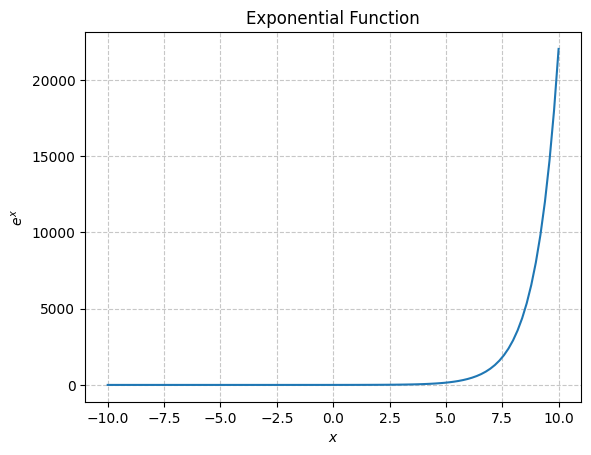

In [3]:
x = np.linspace(-10, 10, 100)
y = np.exp(x)
plt_x_y(x, y, "Exponential Function", "$x$", "$e^x$")


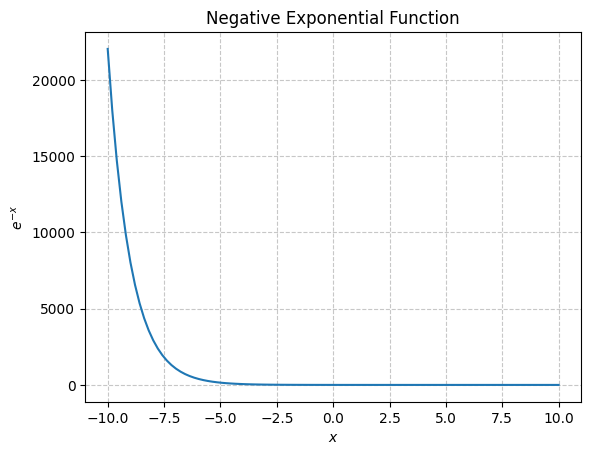

In [4]:
negative_y = np.exp(-x)
plt_x_y(x, negative_y, "Negative Exponential Function", "$x$", "$e^{-x}$")

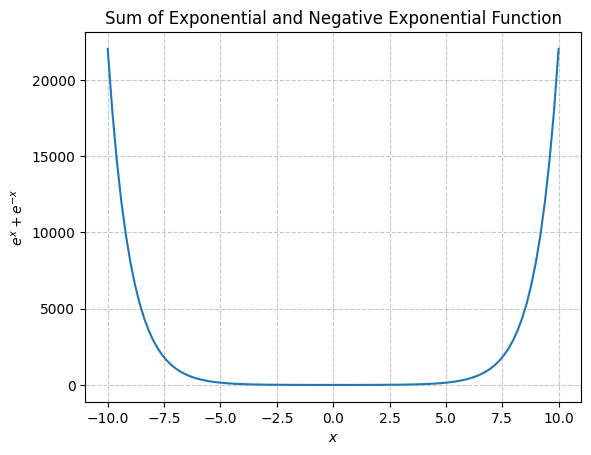

In [5]:
sum_y_negative_y = y + negative_y
plt_x_y(x, sum_y_negative_y, "Sum of Exponential and Negative Exponential Function", "$x$", "$e^x + e^{-x}$")

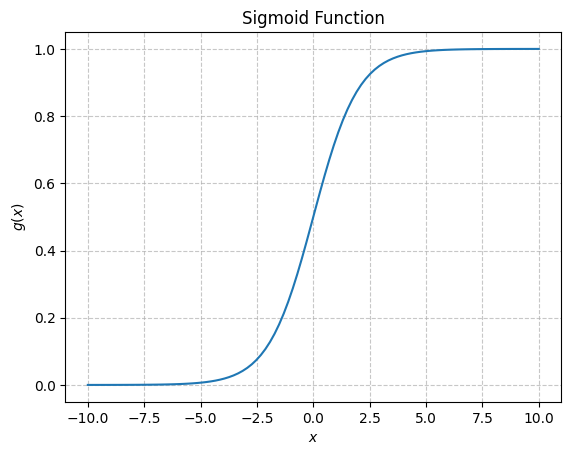

In [6]:
sigmoid_y = 1 / (1 + np.exp(-x))
plt_x_y(x, sigmoid_y, "Sigmoid Function", "$x$", "$g(x)$")

### 🔁 Gradient Comparison: Linear vs Logistic Regression

The following table summarizes various steps used in calculating __Linear Regression__ and __Logistic Regression__.


| Step                     | Linear Regression                           | Logistic Regression                                 | Update Rule                              |
|--------------------------|---------------------------------------------|-----------------------------------------------------|-------------------------------------------|
| **Linear Combination**   | $ z = Xw + b $                              | $ z = Xw + b $                                      | —                                         |
| **Activation**           | $ \hat{y} = z $                             | $ \hat{y} = \frac{1}{1 + \exp(-z)} $                | —                                         |
| **Error**                | $ \hat{y} - y $                             | $ \hat{y} - y $                                     | —                                         |
| **Cost Function**        | $ \mathcal{L} = \frac{1}{2m} \sum_{i=1}^m (\hat{y}_i - y_i)^2 $ | $ \mathcal{L} = -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $ | - |
| **Gradient w.r.t. $w$**  | $ \frac{1}{m} X^T(\hat{y} - y) $            | $ \frac{1}{m} X^T(\hat{y} - y) $                    | $ dw $                                    |
| **Gradient w.r.t. $b$**  | $ \frac{1}{m} \sum(\hat{y} - y) $           | $ \frac{1}{m} \sum(\hat{y} - y) $                   | $ db $                                    |
| **Parameter Update**     | $ w = w - \alpha \cdot dw $                 | $ w = w - \alpha \cdot dw $                         | $ b = b - \alpha \cdot db $               |

The actual gradient decent function **does not** need to actually calculate the cost function. However for can be calculated for monitoring, debugging or evaluation. Also note that the gradient calculation steps for both regressions algorithms are same. Though they started at different cost functions. This is because the Binary Cross-Entropy loss function and the Sigmoid activation function are essentially designed to work together perfectly in this way.  Their derivatives interact in a way that simplifies neatly, resulting in a gradient expression that shares the same structure as the much simpler linear regression case, even though the underlying prediction  $ \hat{y} $ and the loss L are fundamentally different.

### 🔹 Common GLM Families

| Family             | Distribution Y ~                  | Mean (μ)                       | Link Function g(μ)                                      | Inverse Link μ = g⁻¹(η)                   | Use Case                    |
|--------------------|-----------------------------------|--------------------------------|----------------------------------------------------------|--------------------------------------------|-----------------------------|
| **Gaussian**       | N(μ, σ²)                          | μ                              | Identity: g(μ) = μ                                       | μ = η                                     | Linear regression          |
| **Binomial**       | Binomial(n, p)                    | μ = np or p                    | Logit: g(p) = log(p / (1 - p))                          | p = e^η / (1 + e^η)                        | Logistic regression        |
| **Bernoulli**      | Bernoulli(p)                      | p                              | Logit                                                   | p = e^η / (1 + e^η)                        | Binary classification      |
| **Poisson**        | Poisson(λ)                        | λ                              | Log: g(λ) = log(λ)                                      | λ = e^η                                   | Count data, rare events    |
| **Gamma**          | Gamma(μ, φ)                       | μ                              | Inverse: g(μ) = 1 / μ                                   | μ = 1 / η                                 | Skewed positive data       |
| **Inverse Gaussian**| InvGaussian(μ, λ)                | μ                              | Inverse squared: g(μ) = 1 / μ²                          | μ = sqrt(1 / η)                            | Time-to-event modeling     |
